In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph_service import NodeActionData, NodeType
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.action.action_graph import NetworkXBackingStore
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey, SyftVerifyKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph_service import ExecutionStatusPartitionKey
from syft.store.document_store import QueryKeys

print(sy.__version__)


signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
in_mem_graph_config = InMemoryGraphConfig()
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)


# helper functions
def create_action_obj_node(verify_key: SyftVerifyKey) -> NodeActionData:
    """
    Helper function to create an action object node of a random
    array of 3 float numbers
    """
    random_data = np.random.rand(3)
    action_obj = ActionObject.from_obj(random_data)
    action_obj_node = NodeActionData.from_action_obj(
        action_obj=action_obj, credentials=verify_key
    )
    assert action_obj_node.type == NodeType.ACTION_OBJECT

    return action_obj_node


def create_action_node(verify_key: SyftVerifyKey) -> NodeActionData:
    random_data = np.random.rand(3)
    action_obj = ActionObject.from_obj(random_data)
    action = Action(
        path="action.execute",
        op="np.array",
        remote_self=None,
        args=[action_obj.syft_lineage_id],
        kwargs={},
    )
    action_node = NodeActionData.from_action(action=action, credentials=verify_key)
    assert action_node.type == NodeType.ACTION
    return action_node

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.0


## `NodeActionData`

In [16]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])
action = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)

In [17]:
node_action_data = NodeActionData.from_action(action=action, 
                                              credentials=verify_key)

In [18]:
node_action_data

```python
class NodeActionData:
  id: str = c5b8829745d44befac28a5f8d1254d7d
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-05 00:48:13
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

### mutagen

In [22]:
action_obj_d = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
node_action_data1 = NodeActionData.from_action(action=action1, 
                                               credentials=verify_key)
as_type_action_obj = ActionObject.from_obj('np.int32')
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
node_action_data2 = NodeActionData.from_action(action=action2, 
                                               credentials=verify_key)


In [32]:
node_action_data1

```python
class NodeActionData:
  id: str = eebdc7dad2564de394d355d5965c9bd3
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-05 01:10:45
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [53]:
node_action_data1.id == action_obj_d.id

False

In [33]:
node_action_data2

```python
class NodeActionData:
  id: str = 01dd0ce29a0247c4b20d7c980d26fd99
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-05 01:10:45
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [ ]:
node_action_data2.id == 

In [38]:
node_action_data2 == sy.deserialize(sy.serialize(node_action_data2, to_bytes=True), from_bytes=True)

True

## `NodeActionDataUpdate`

In [40]:
node_action_data_update = NodeActionDataUpdate()
node_action_data_update

```python
class NodeActionDataUpdate:
  id: str = None
  type: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = <class 'syft.types.syft_metaclass.Empty'>
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-05-05 02:19:27
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutagen: str = <class 'syft.types.syft_metaclass.Empty'>
  next_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>
  last_nm_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>

```

In [42]:
pprint(node_action_data_update.to_dict(exclude_empty=True))

{'id': None, 'updated_at': syft.types.datetime.DateTime}


In [43]:
vars(node_action_data_update)

{'id': None,
 'type': syft.types.syft_metaclass.Empty,
 'status': syft.types.syft_metaclass.Empty,
 'retry': syft.types.syft_metaclass.Empty,
 'created_at': syft.types.syft_metaclass.Empty,
 'updated_at': syft.types.datetime.DateTime,
 'credentials': syft.types.syft_metaclass.Empty,
 'is_mutated': syft.types.syft_metaclass.Empty,
 'is_mutagen': syft.types.syft_metaclass.Empty,
 'next_mutagen_node': syft.types.syft_metaclass.Empty,
 'last_nm_mutagen_node': syft.types.syft_metaclass.Empty}

In [48]:
for key, val in node_action_data2.to_dict(exclude_empty=True).items():
    setattr(node_action_data_update, key, val)

ValueError: "NodeActionDataUpdate" object has no field "user_verify_key"

In [49]:
node_action_data_update

```python
class NodeActionDataUpdate:
  id: str = 01dd0ce29a0247c4b20d7c980d26fd99
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-05 01:10:45
  updated_at: str = None
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutagen: str = <class 'syft.types.syft_metaclass.Empty'>
  next_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>
  last_nm_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>

```

In [50]:
node_action_data2

```python
class NodeActionData:
  id: str = 01dd0ce29a0247c4b20d7c980d26fd99
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-05 01:10:45
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

## `NetworkXBackingStore`

### Node related functions

In [6]:
action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)

In [7]:
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)

In [107]:
networkx_store.set(uid=action_obj_node.id, data=action_obj_node)
networkx_store.set(uid=action_node.id, data=action_node)

In [108]:
networkx_store.nodes()

NodeDataView({<UID: 34297a203ef74befb3fb942c81d86d7c>: {'data': class NodeActionData:
  id: str = 34297a203ef74befb3fb942c81d86d7c
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 20:11:34
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: c1f0de076ae04f62a90d7668d2b10a78>: {'data': class NodeActionData:
  id: str = c1f0de076ae04f62a90d7668d2b10a78
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 20:11:34
  updated_at: str = None
  user_verify_key: str = 056d6c8a9d664bbda3b5f4cc2549245aa1c6b9b739aad91905cb221202d11a07
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}})

In [9]:
update_node = NodeActionDataUpdate(status=1, 
                                   is_mutagen=True, 
                                   is_mutated=True)
update_node

```python
class NodeActionDataUpdate:
  id: str = <class 'syft.types.syft_metaclass.Empty'>
  type: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = ExecutionStatus.DONE
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-05-07 04:11:09
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>
  last_nm_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>

```

In [10]:
action_node

```python
class NodeActionData:
  id: str = e2961f1b1b78435fa3fd4fb27081ec53
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-07 04:10:55
  updated_at: str = None
  user_verify_key: str = 55c5e4a84b894843ca893fc7c421c9a8d042c90195a6cf8a68366910898cfa40
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [11]:
for key, val in update_node.to_dict(exclude_empty=True).items():
    setattr(action_node, key, val)

In [12]:
action_node

```python
class NodeActionData:
  id: str = e2961f1b1b78435fa3fd4fb27081ec53
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.DONE
  retry: str = 0
  created_at: str = 2023-05-07 04:10:55
  updated_at: str = 2023-05-07 04:11:09
  user_verify_key: str = 55c5e4a84b894843ca893fc7c421c9a8d042c90195a6cf8a68366910898cfa40
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [13]:
networkx_store.update(uid=action_node.id, data=action_node)

### Edge related functions

In [57]:
in_mem_graph_config.client_config.file_path

PosixPath('/tmp/action_graph.bytes')

In [3]:
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)

In [36]:
action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)
action_node_2: NodeActionData = create_action_node(verify_key)
networkx_store.set(uid=action_obj_node.id, data=action_obj_node)
networkx_store.set(uid=action_node.id, data=action_node)
networkx_store.set(uid=action_node_2.id, data=action_node_2)

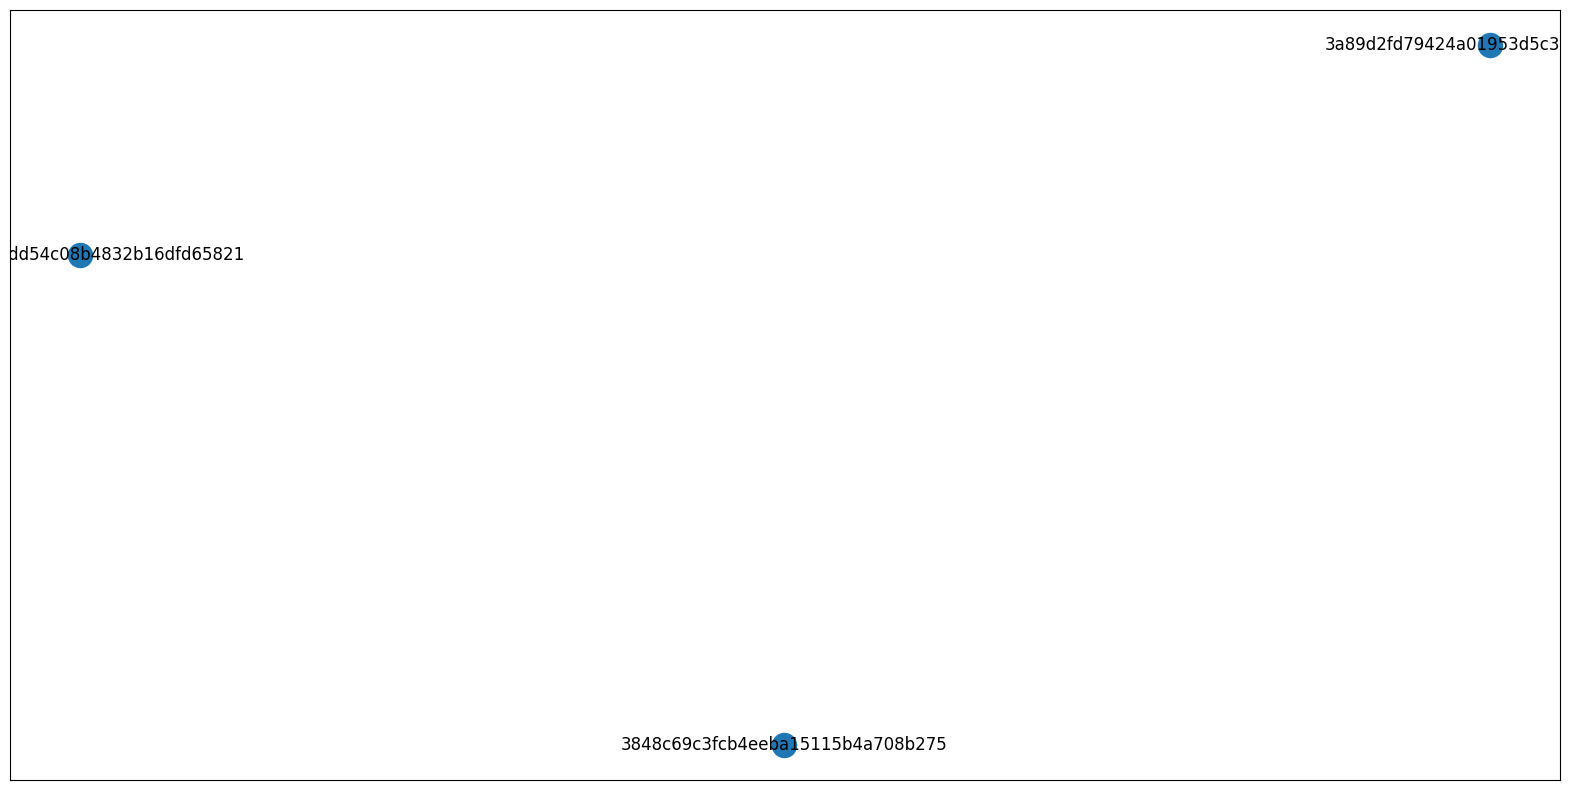

In [37]:
networkx_store.visualize()

In [38]:
networkx_store.add_edge(parent=action_node.id, child = action_obj_node.id)

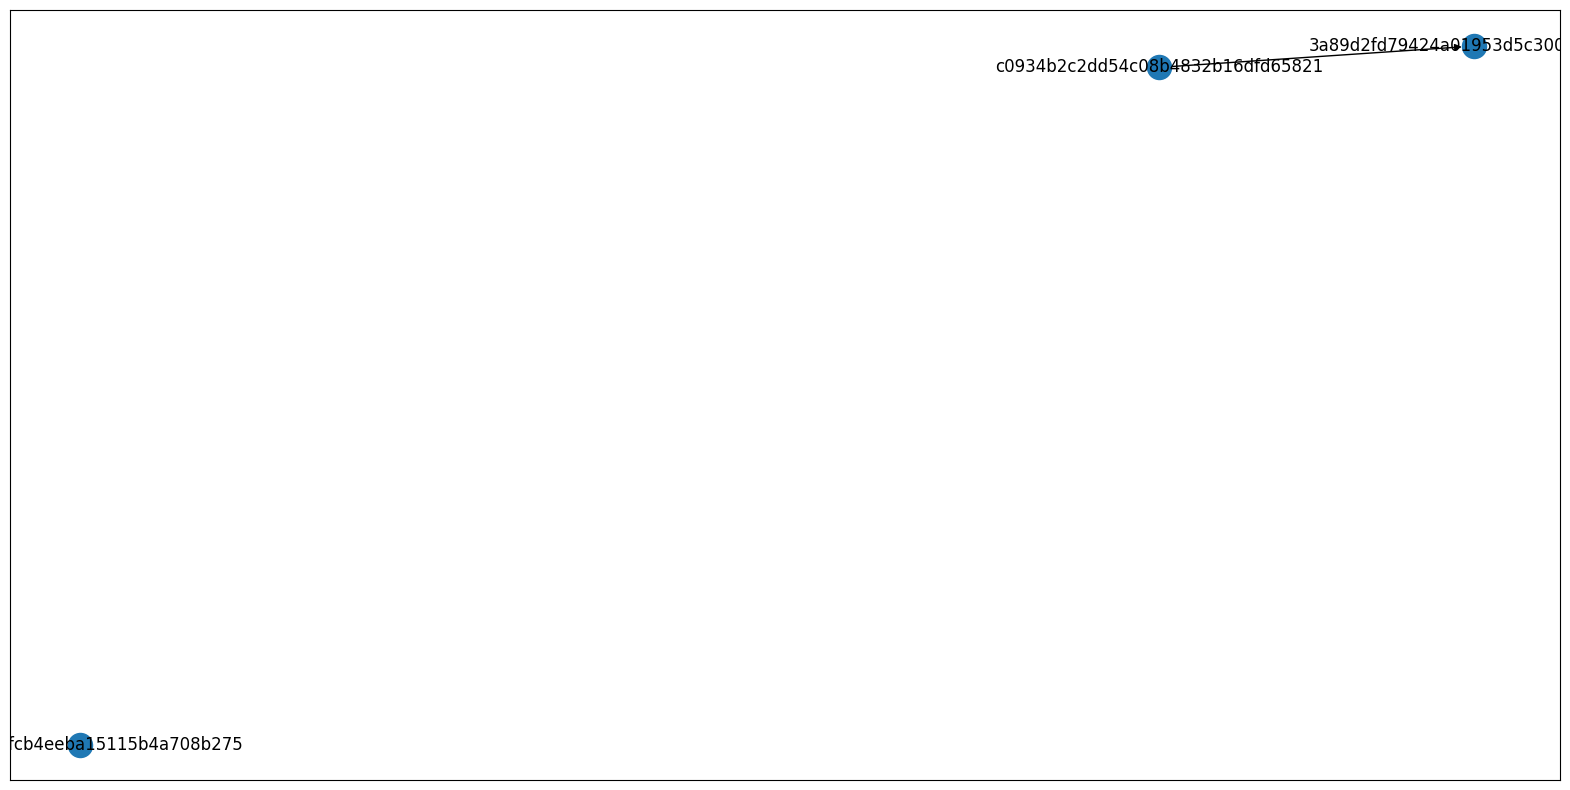

In [39]:
networkx_store.visualize()

In [40]:
networkx_store.add_edge(parent=action_obj_node.id, child = action_node_2.id)

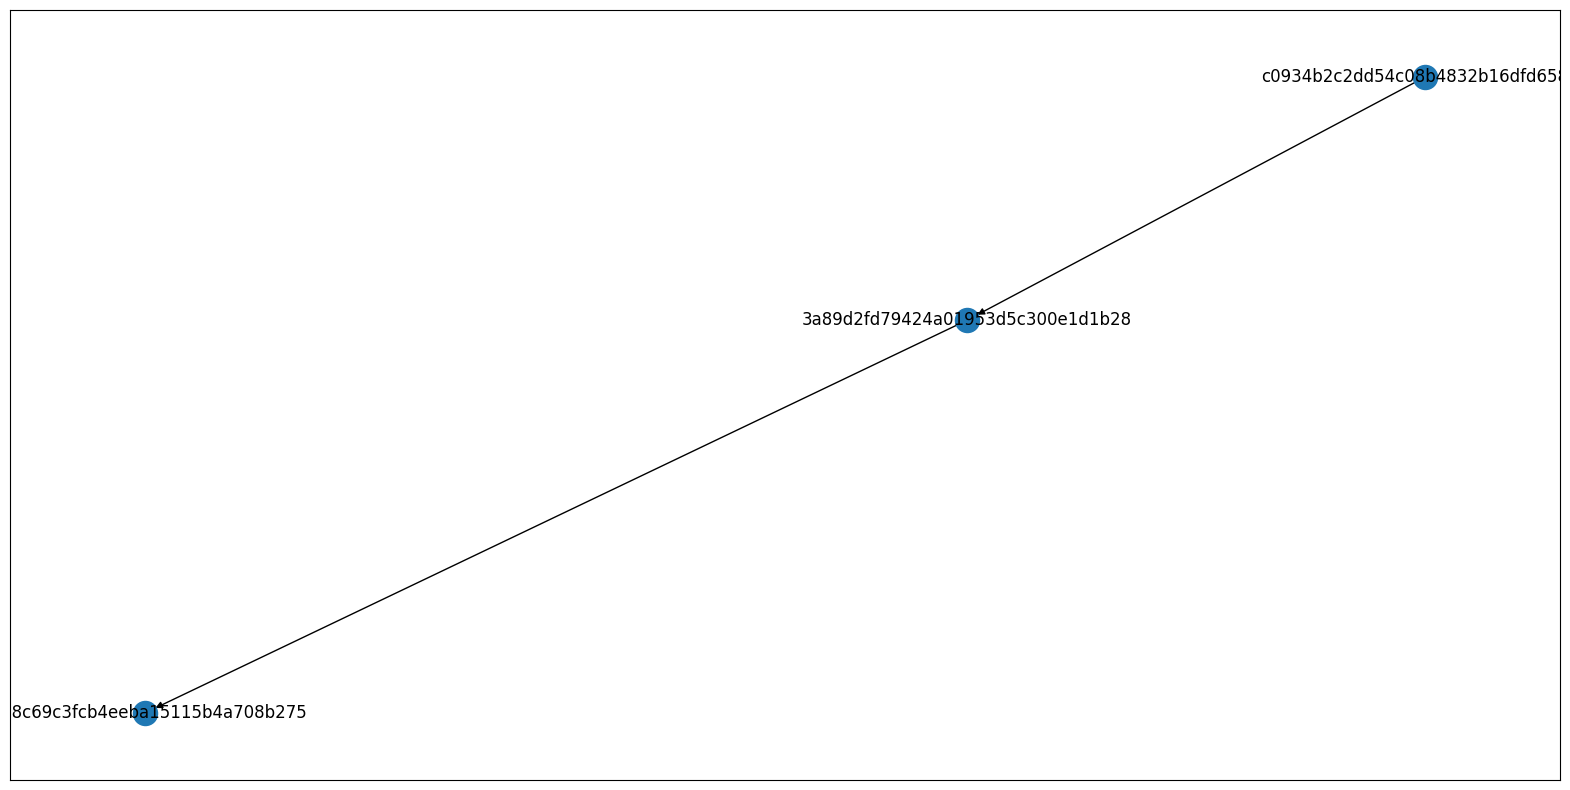

In [41]:
networkx_store.visualize()

In [42]:
networkx_store.add_edge(parent=action_node_2.id, child = action_node.id)

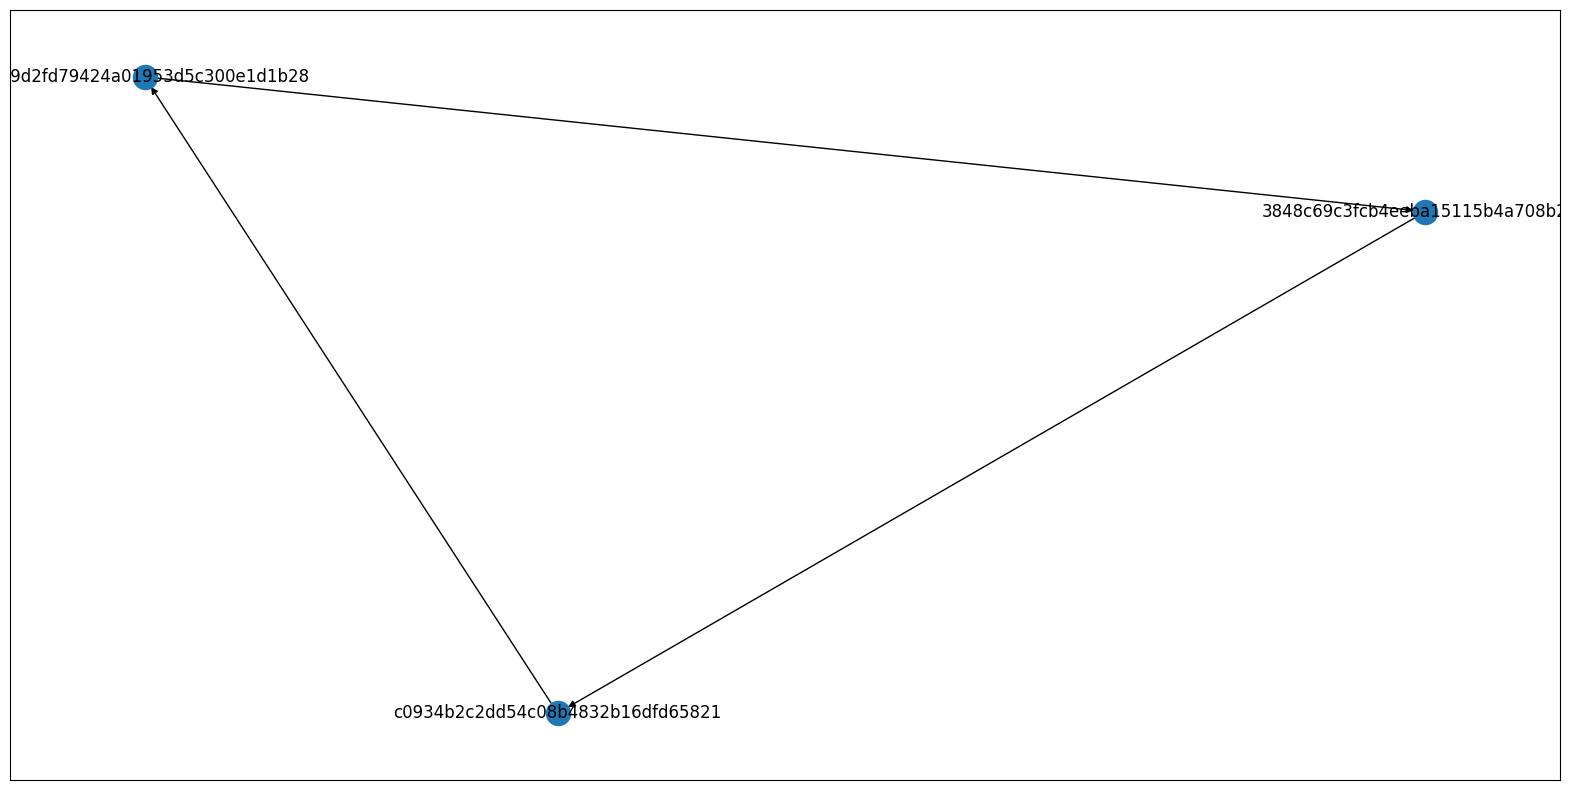

In [43]:
networkx_store.visualize()

In [44]:
list(networkx_store.find_neighbors(uid=action_obj_node.id))

,type,id
0,<UID: 3848c69c3fcb4eeba15115b4a708b275>,3848c69c3fcb4eeba15115b4a708b275


In [45]:
networkx_store.nodes()

NodeDataView({<UID: 3a89d2fd79424a01953d5c300e1d1b28>: {'data': class NodeActionData:
  id: str = 3a89d2fd79424a01953d5c300e1d1b28
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 20:55:12
  updated_at: str = None
  user_verify_key: str = c361ec05bb2870e64b0ac1816425c0e34d6bfae2d3bc08a38edff103b2454fbf
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: c0934b2c2dd54c08b4832b16dfd65821>: {'data': class NodeActionData:
  id: str = c0934b2c2dd54c08b4832b16dfd65821
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 20:55:12
  updated_at: str = None
  user_verify_key: str = c361ec05bb2870e64b0ac1816425c0e34d6bfae2d3bc08a38edff103b2454fbf
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 3848c

In [46]:
list(networkx_store.get_predecessors(action_obj_node.id))

,type,id
0,<UID: c0934b2c2dd54c08b4832b16dfd65821>,c0934b2c2dd54c08b4832b16dfd65821


In [47]:
networkx_store.remove_edge(parent=action_node.id, child=action_obj_node.id)


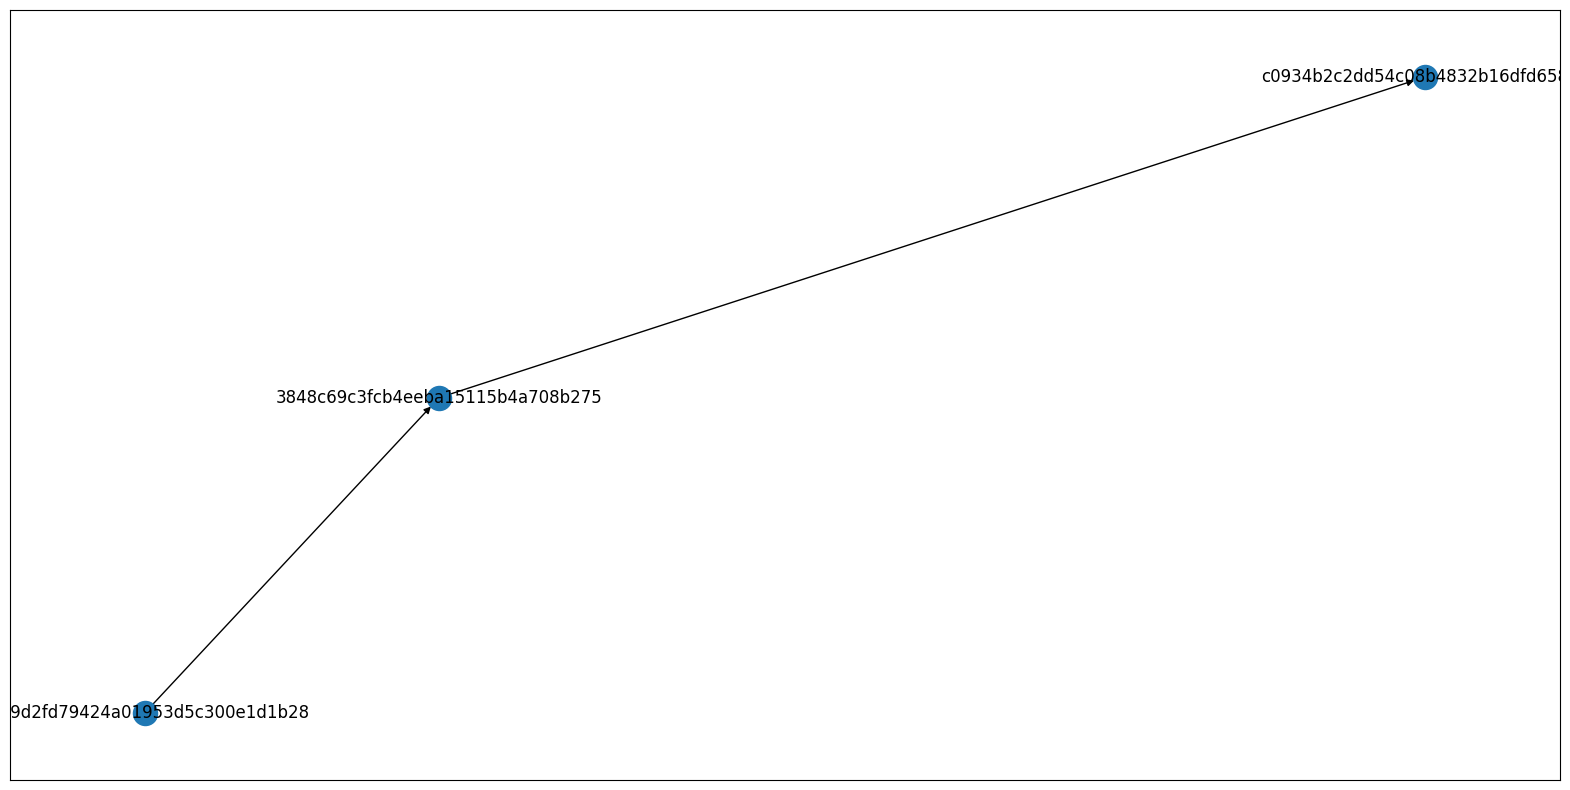

In [48]:
networkx_store.visualize()

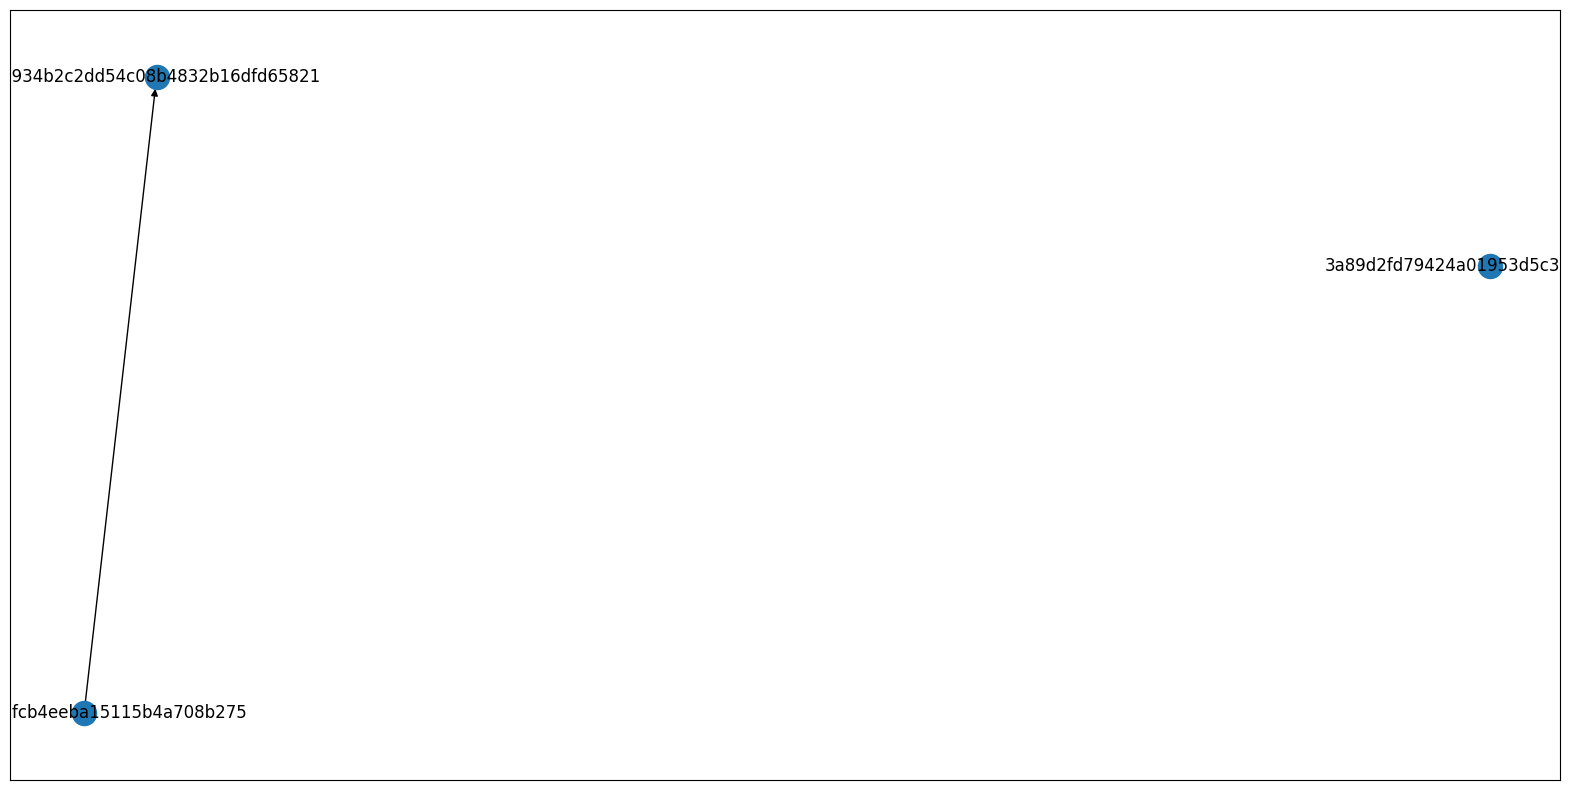

In [49]:
networkx_store.remove_edge(parent=action_obj_node.id, child=action_node_2.id)
networkx_store.visualize()

### `save` and `load` methods

Default location

In [5]:
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)

action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)
action_node_2: NodeActionData = create_action_node(verify_key)
networkx_store.set(uid=action_obj_node.id, data=action_obj_node)
networkx_store.set(uid=action_node.id, data=action_node)
networkx_store.set(uid=action_node_2.id, data=action_node_2)

In [6]:
networkx_store.save()

In [7]:
networkx_store_2 = NetworkXBackingStore(store_config=in_mem_graph_config)

In [8]:
networkx_store_2.nodes()

NodeDataView({<UID: 0d6adbd12b254284b1c81acd2b31a4ce>: {'data': class NodeActionData:
  id: str = 0d6adbd12b254284b1c81acd2b31a4ce
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 21:29:52
  updated_at: str = None
  user_verify_key: str = 8e0672a18e91a121cb1aa97bb724a6ebe62da2a4daccf888d0729416ec66605d
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: e21f80843b064ec7b667cc5e304ea53d>: {'data': class NodeActionData:
  id: str = e21f80843b064ec7b667cc5e304ea53d
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-06 21:29:52
  updated_at: str = None
  user_verify_key: str = 8e0672a18e91a121cb1aa97bb724a6ebe62da2a4daccf888d0729416ec66605d
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: 9cbd9

Custom location

In [10]:
custom_client_conf = InMemoryStoreClientConfig(
        filename="custom_action_graph.bytes", path="/tmp"
)
custom_client_conf

InMemoryStoreClientConfig(filename='custom_action_graph.bytes', path='/tmp')

In [11]:
in_mem_graph_config.client_config = custom_client_conf

In [12]:
networkx_store = NetworkXBackingStore(store_config=in_mem_graph_config)

action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)
action_node_2: NodeActionData = create_action_node(verify_key)
networkx_store.set(uid=action_obj_node.id, data=action_obj_node)
networkx_store.set(uid=action_node.id, data=action_node)
networkx_store.set(uid=action_node_2.id, data=action_node_2)

In [13]:
custom_client_conf.file_path

PosixPath('/tmp/custom_action_graph.bytes')

### `subgraph` method

In [47]:
status = ExecutionStatus.PROCESSING
qks = QueryKeys(qks=[ExecutionStatusPartitionKey.with_obj(status)])

In [48]:
action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)
action_node_2: NodeActionData = create_action_node(verify_key)
networkx_store.set(uid=action_obj_node.id, data=action_obj_node)
networkx_store.set(uid=action_node.id, data=action_node)
networkx_store.set(uid=action_node_2.id, data=action_node_2)

In [49]:
networkx_store.subgraph(qks).nodes()

NodeView((<UID: 65fd51cda3bc4eab85d3de3d6c291969>, <UID: 4e3f7b6f5d4c4a978c8e654444e91a4e>, <UID: 4e8cefd70e6f4b9aa255598297916587>))

In [54]:
action_node: NodeActionData = create_action_node(verify_key)
action_node.status = ExecutionStatus.DONE
networkx_store.set(uid=action_node.id, data=action_node)

In [55]:
status = ExecutionStatus.DONE
qks = QueryKeys(qks=[ExecutionStatusPartitionKey.with_obj(status)])
networkx_store.subgraph(qks).nodes()

NodeView((<UID: e2d18d31aa4646d2b255514f68a843bb>,))

## `InMemoryActionGraphStore`


### Test methods `set, get, delete, is_parent`

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(store_config=in_mem_graph_config)

action_obj_node: NodeActionData = create_action_obj_node(verify_key)
action_node: NodeActionData = create_action_node(verify_key)
action_node_2: NodeActionData = create_action_node(verify_key)

In [3]:
result = in_mem_graph_store.set(action_obj_node, credentials=verify_key)

In [4]:
result.ok() == action_obj_node

True

In [5]:
in_mem_graph_store.get(action_obj_node.id, verify_key).ok() == action_obj_node

True

In [6]:
result2 = in_mem_graph_store.set(
        action_node, credentials=verify_key, parent_uids=[action_obj_node.id]
    )

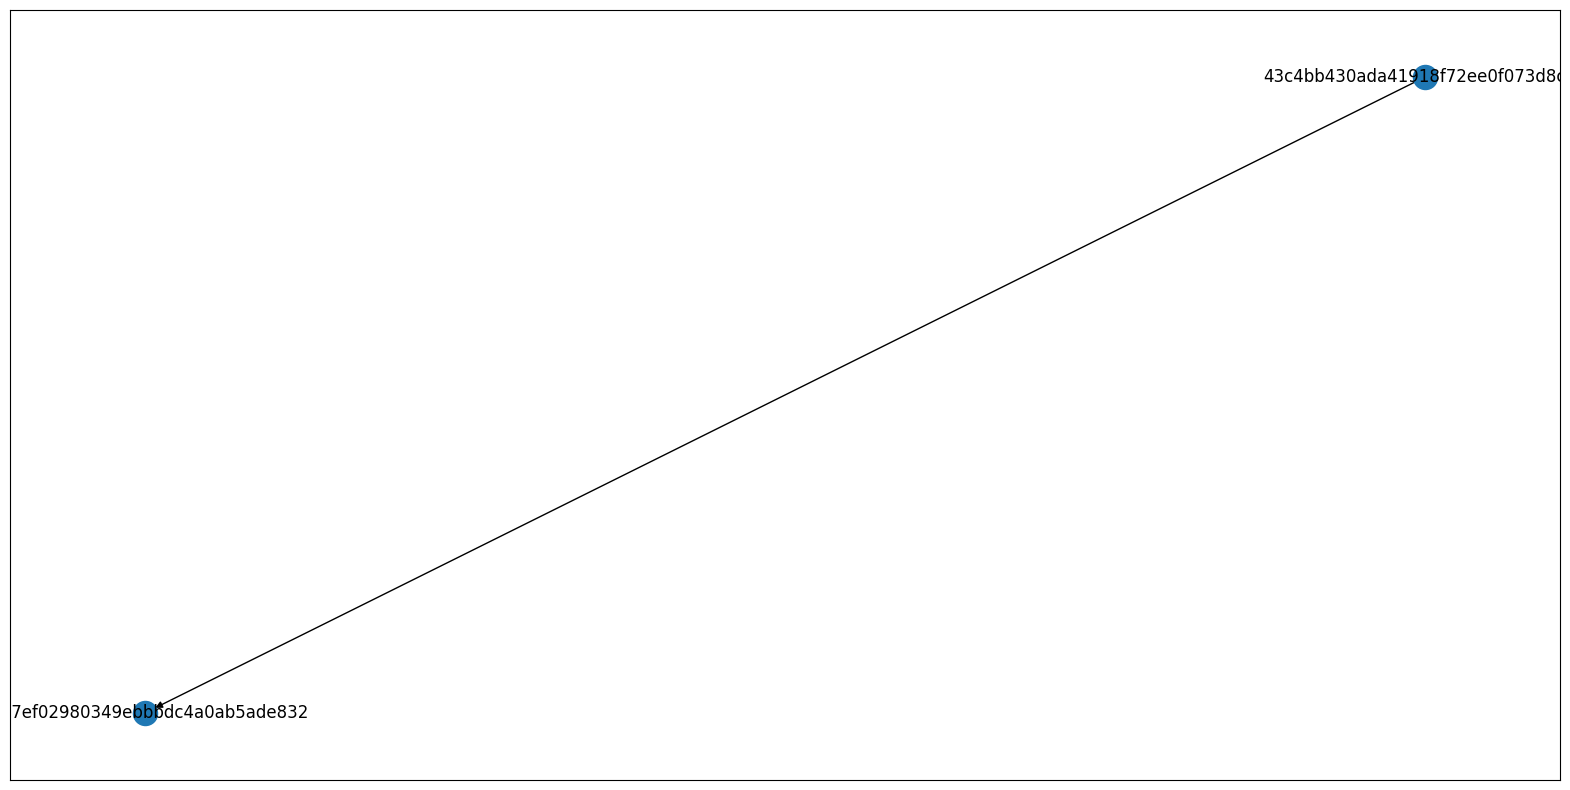

In [7]:
in_mem_graph_store.graph.visualize()

In [8]:
result3 = in_mem_graph_store.set(
    action_node_2,
    credentials=verify_key,
    parent_uids=[action_obj_node.id, action_node.id],
)

In [9]:
assert result3.ok() == action_node_2

In [10]:
len(in_mem_graph_store.nodes(verify_key).ok())

3

In [11]:
len(in_mem_graph_store.edges(verify_key).ok())

3

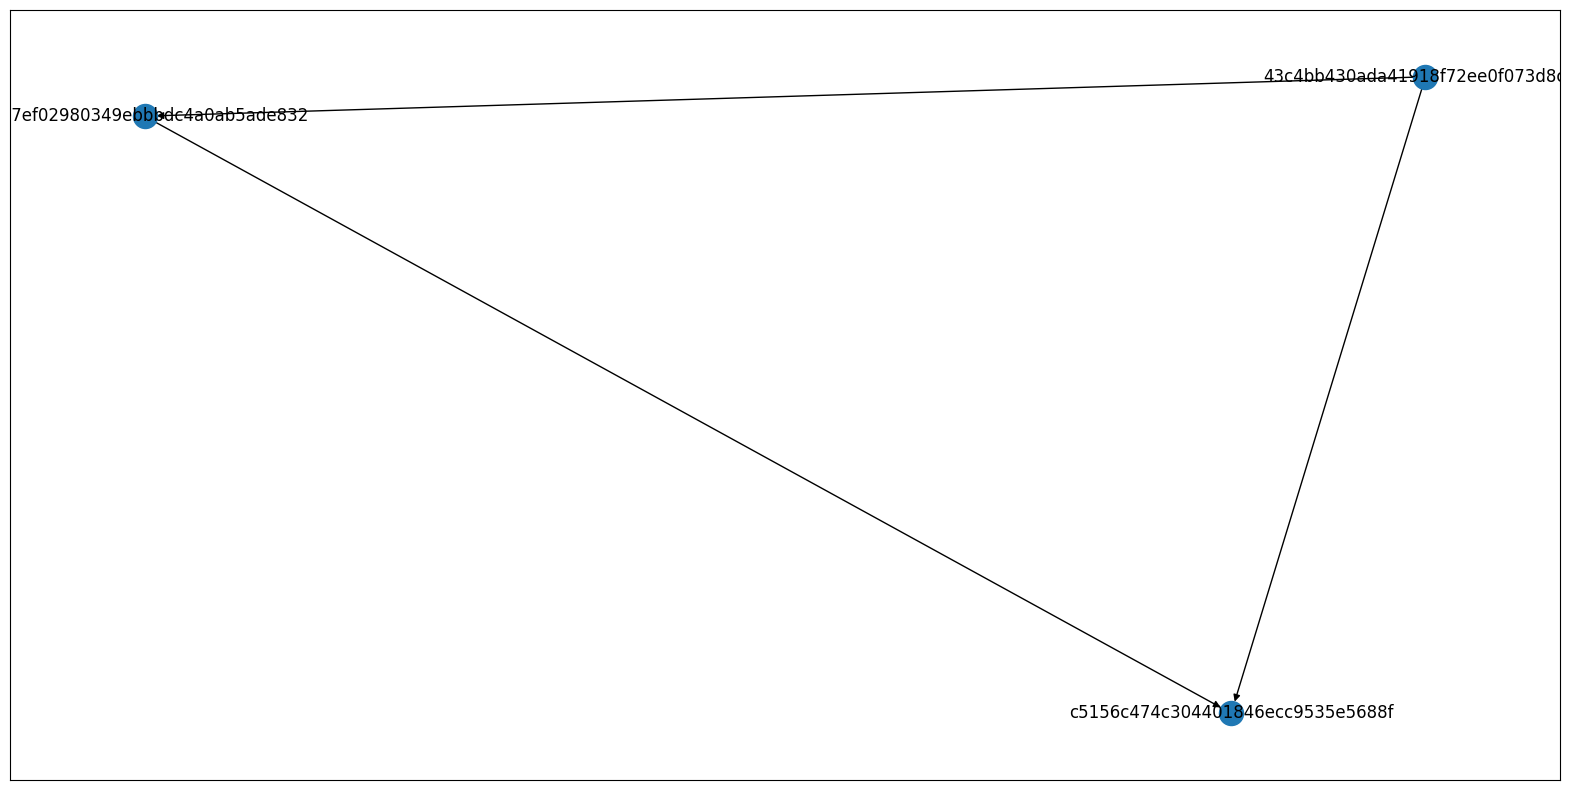

In [12]:
in_mem_graph_store.graph.visualize()

In [13]:
action_obj_node_2: NodeActionData = create_action_obj_node(verify_key)

result3 = in_mem_graph_store.set(
    action_obj_node_2,
    credentials=verify_key,
)

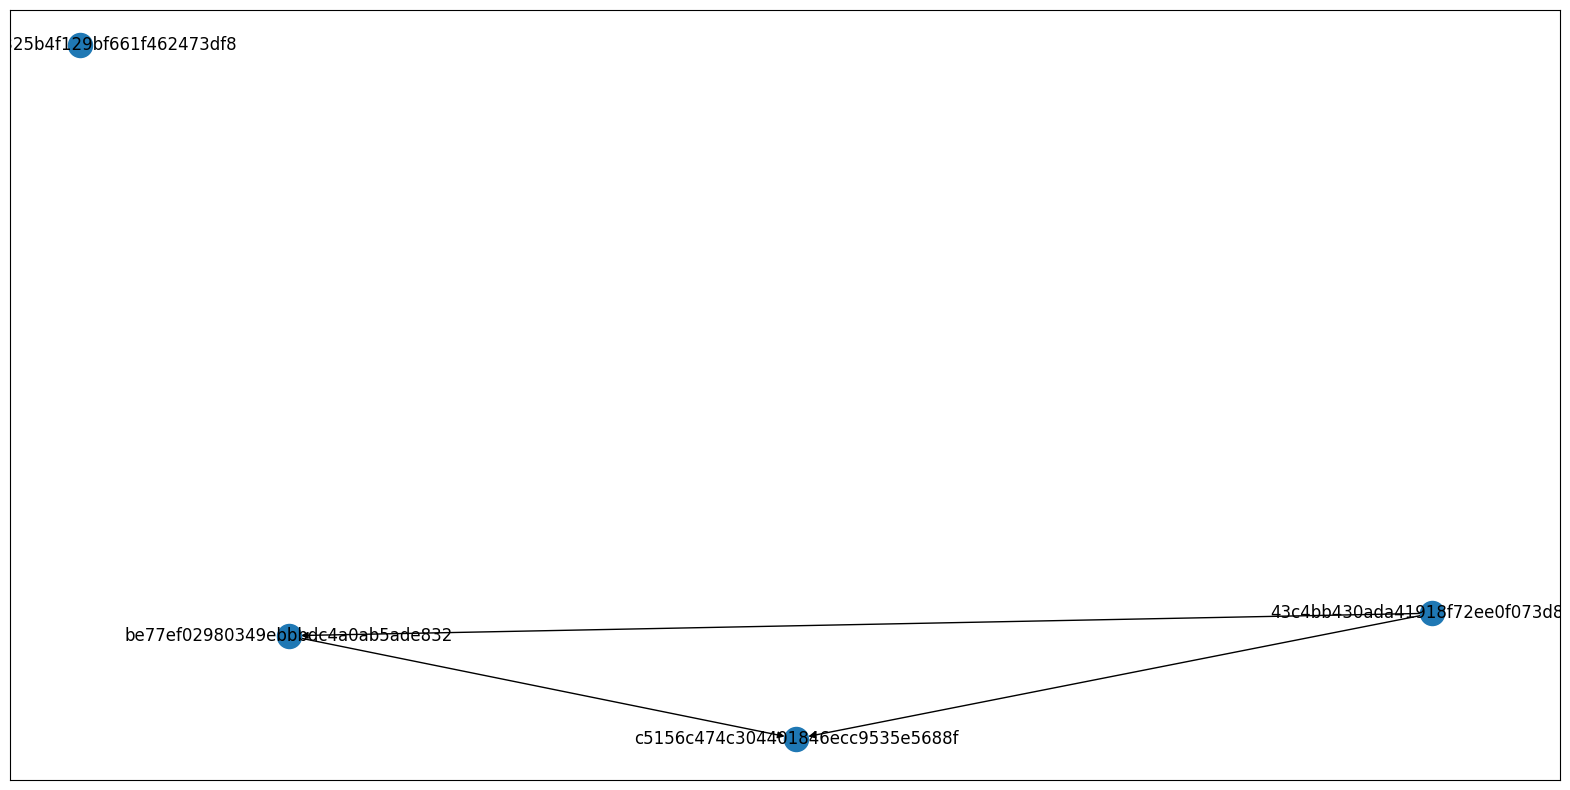

In [14]:
in_mem_graph_store.graph.visualize()

In [15]:
in_mem_graph_store.delete(action_obj_node.id, verify_key)

Ok(True)

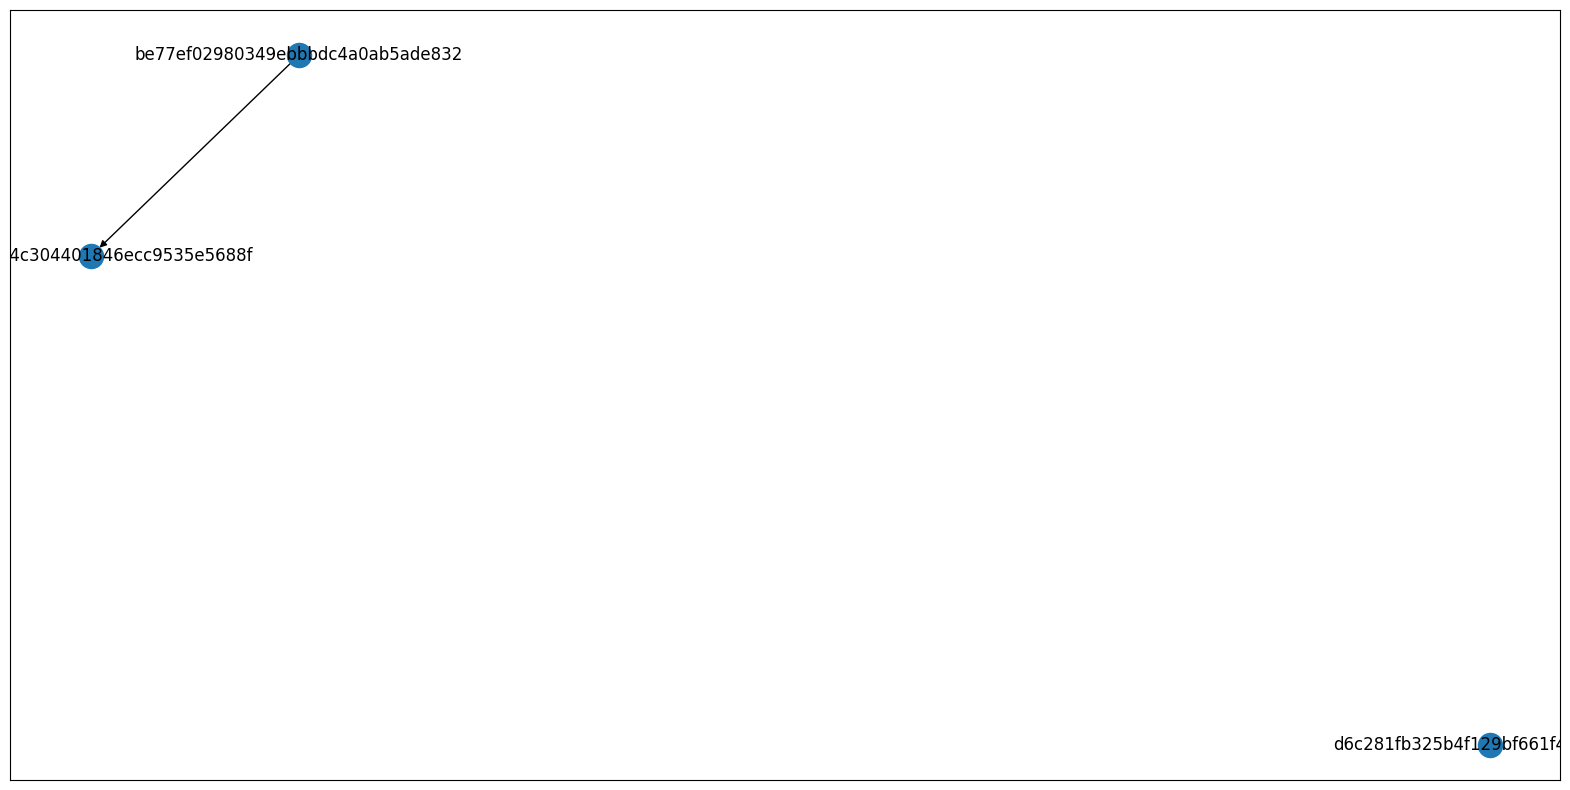

In [16]:
in_mem_graph_store.graph.visualize()

In [17]:
in_mem_graph_store.delete(action_obj_node.id, verify_key)

Err('Node does not exists with id: 43c4bb430ada41918f72ee0f073d8c66')

In [19]:
res = in_mem_graph_store.get(action_obj_node.id, verify_key)

In [20]:
res

Err('Node does not exists with id: 43c4bb430ada41918f72ee0f073d8c66')

In [21]:
from result import Err

In [22]:
isinstance(res, Err)

True

In [23]:
isinstance(Err, str)

False

In [24]:
from syft.service.response import SyftNotReady

### Test `update`

In [8]:
action_obj_node: NodeActionData = create_action_obj_node(verify_key)
result = in_mem_graph_store.set(action_obj_node, credentials=verify_key).ok()
update_node = NodeActionDataUpdate(
    status=ExecutionStatus.DONE, is_mutagen=True, is_mutated=True
)
result2 = in_mem_graph_store.update(
    uid=result.id, data=update_node, credentials=verify_key
).ok()

In [9]:
result

```python
class NodeActionData:
  id: str = c68044a239324c5cb3974a56954152e5
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.DONE
  retry: str = 0
  created_at: str = 2023-05-09 01:54:48
  updated_at: str = 2023-05-09 01:54:48
  user_verify_key: str = 266e89647fa07be36a9accb9ab978b7a1c0a297d5ff4831187697105ee78ae37
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [10]:
result2

```python
class NodeActionData:
  id: str = c68044a239324c5cb3974a56954152e5
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.DONE
  retry: str = 0
  created_at: str = 2023-05-09 01:54:48
  updated_at: str = 2023-05-09 01:54:48
  user_verify_key: str = 266e89647fa07be36a9accb9ab978b7a1c0a297d5ff4831187697105ee78ae37
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [11]:
update_node

```python
class NodeActionDataUpdate:
  id: str = <class 'syft.types.syft_metaclass.Empty'>
  type: str = <class 'syft.types.syft_metaclass.Empty'>
  status: str = ExecutionStatus.DONE
  retry: str = <class 'syft.types.syft_metaclass.Empty'>
  created_at: str = <class 'syft.types.syft_metaclass.Empty'>
  updated_at: str = 2023-05-09 01:54:48
  credentials: str = <class 'syft.types.syft_metaclass.Empty'>
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>
  last_nm_mutagen_node: str = <class 'syft.types.syft_metaclass.Empty'>

```

In [12]:
in_mem_graph_store.get(result.id, verify_key)

Ok(class NodeActionData:
  id: str = c68044a239324c5cb3974a56954152e5
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.DONE
  retry: str = 0
  created_at: str = 2023-05-09 01:54:48
  updated_at: str = 2023-05-09 01:54:48
  user_verify_key: str = 266e89647fa07be36a9accb9ab978b7a1c0a297d5ff4831187697105ee78ae37
  is_mutated: str = True
  is_mutagen: str = True
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
)

### A simple in memory action graph (no mutation)

In [24]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)

action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])
action_obj_node_a: NodeActionData = NodeActionData.from_action_obj(
    action_obj_a, verify_key
)
action_obj_node_b: NodeActionData = NodeActionData.from_action_obj(
    action_obj_b, verify_key
)
in_mem_graph_store.set(action_obj_node_a, credentials=verify_key)
in_mem_graph_store.set(action_obj_node_b, credentials=verify_key)
action = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)

in_mem_graph_store.set(action, 
                       credentials=verify_key, 
                       parent_uids=[action_obj_node_a.id, 
                                    action_obj_node_b.id])

Ok(syft.service.action.action_object.Action)

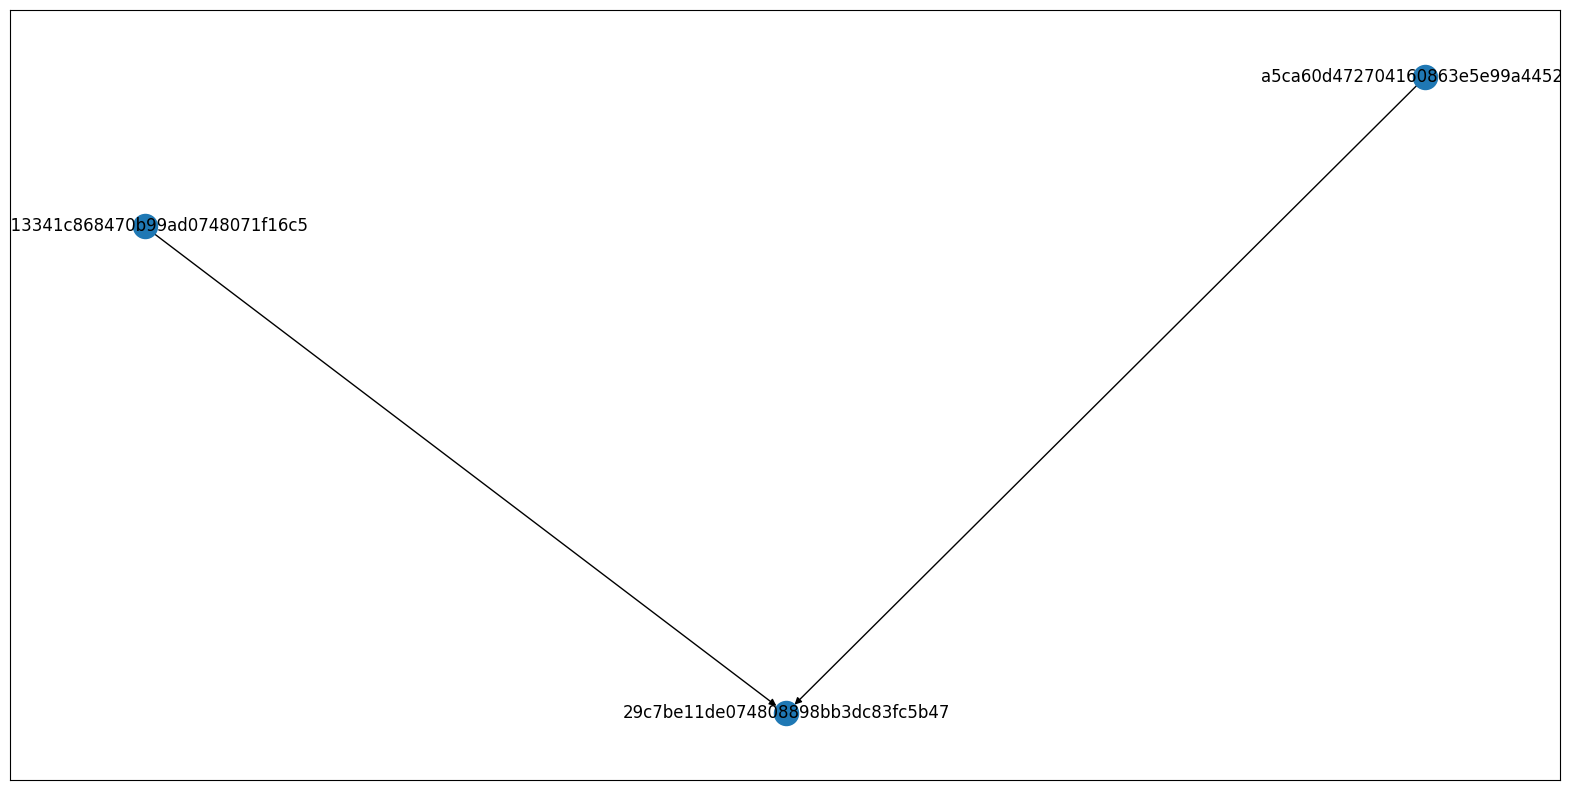

In [25]:
in_mem_graph_store.graph.visualize()

In [28]:
len(in_mem_graph_store.edges(verify_key).ok())

2

In [30]:
len(in_mem_graph_store.nodes(verify_key).ok())


3

In [35]:
list(in_mem_graph_store.nodes(verify_key).ok())[0]

(<UID: a5ca60d472704160863e5e99a4452fb8>,
 {'data': class NodeActionData:
    id: str = a5ca60d472704160863e5e99a4452fb8
    type: str = NodeType.ACTION_OBJECT
    status: str = ExecutionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-05-09 02:30:57
    updated_at: str = None
    user_verify_key: str = 266e89647fa07be36a9accb9ab978b7a1c0a297d5ff4831187697105ee78ae37
    is_mutated: str = False
    is_mutagen: str = False
    next_mutagen_node: str = None
    last_nm_mutagen_node: str = None})

In [36]:
list(in_mem_graph_store.nodes(verify_key).ok())[1]

(<UID: 7d513341c868470b99ad0748071f16c5>,
 {'data': class NodeActionData:
    id: str = 7d513341c868470b99ad0748071f16c5
    type: str = NodeType.ACTION_OBJECT
    status: str = ExecutionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-05-09 02:30:57
    updated_at: str = None
    user_verify_key: str = 266e89647fa07be36a9accb9ab978b7a1c0a297d5ff4831187697105ee78ae37
    is_mutated: str = False
    is_mutagen: str = False
    next_mutagen_node: str = None
    last_nm_mutagen_node: str = None})

In [43]:
list(in_mem_graph_store.nodes(verify_key).ok())[2]

(<UID: 29c7be11de074808898bb3dc83fc5b47>,
 {'data': syft.service.action.action_object.Action})